# Домашнее задание №1


Задание присылать на обе почты почты **aleksartamonov@gmail.com**  **dashkov.alexander.om@gmail.com** в виде ссылки на colab

В теме письма указать ***CV_HSE_2021 HW1 <Фамилия Имя>***

soft deadline: 14.02.2021T23:59:00+0300

hard deadline: 21.02.2021T23:59:00+0300

## Теоретический блок

##### Задача 1 (3 балла)

Когда Вы заходите в темную комнату из светлого помещения, то проходит некоторое время, прежде чем Вы станете видеть достаточно хорошо, чтобы различить очертания предметов. Какая из обсуждавшихся на лекции особенностей зрительного восприятия человека объясняет это явление? Какой процесс происходит в зрительной системе?

Яркостная адаптация и контрастная чувствительность. Когда яркость очень низкая – перестают работать колбочки, включаются палочки, зрительной системе необходимо время на это переключение. Процесс занимает ~30 минут – палочки очень чувствительны к свету и после адаптации могут реагировать на попадание на них даже нескольких фотонов.



##### Задача 2 (3 балла)

Рассмотрим некоторое цветовое пространство $R_{new}G_{new}B_{new}$, получающееся из исходного RGB по правилу:

$$
R_{new} = a_{11}R+a_{12}G+a_{13}B+a_{14}\\
G_{new} = a_{21}R+a_{22}G+a_{23}B+a_{24}\\
B_{new} = a_{31}R+a_{32}G+a_{33}B+a_{34}
$$

где R, G и B – вещественные числа от 0 до 1. 

Какими свойствами должны обладать коэффициенты $a_{ij}$, чтобы можно было без потерь информации переходить из одного пространства в другое и обратно?
(*) Какими свойствами должны обладать коэффициенты $a_{ij}$ , чтобы вещественные числа $R_{new},G_{new}$ и $B_{new}$ тоже лежали внутри куба со стороной 1 и полностью плотно его заполняли?

1.   Представим задачу в матричном виде $Ax = b$, где матрица $A$ образована коэффициентами $a_{ij}$ и имеет размерность 3x3. Тогда для перехода в другое пространства нам нужно будет заменить базис – это можно сделать с помощью матрицы перехода. Соостветсвенно наше ограничение на матрицу $A$ – матрица должна быть неврождена, т.е. ее определитель должен быть не равен 0.
2.   Для того чтобы x (вещественные числа $R_{new}, G_{new}, B_{new}$ находились внутри куба, необходимо, чтобы оператор, воздействующий на нашу матрицу $A$ совершал какое-то ортогональное преобразования (не менял форму и не расстягивал куб).

## Практический блок

In [1]:
import cv2
import matplotlib.pylab as plt
from google.colab.patches import cv2_imshow
from itertools import permutations
%matplotlib inline

import numpy as np

##### Задача 3 (3 балла)

Загрузите изображение *lena.jpg* в переменную **lena**. Отобразите результат на экран.

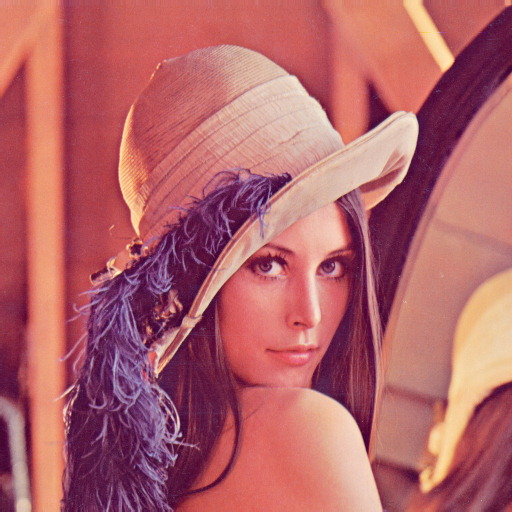

In [2]:
lena = cv2.imread("lena.jpg")
cv2_imshow(lena)

##### Задача 4 (3 балла)

Поменяйте местами левую верхнюю и правую нижнюю четвертинки изображения **lena** и отобразите результат на экран.

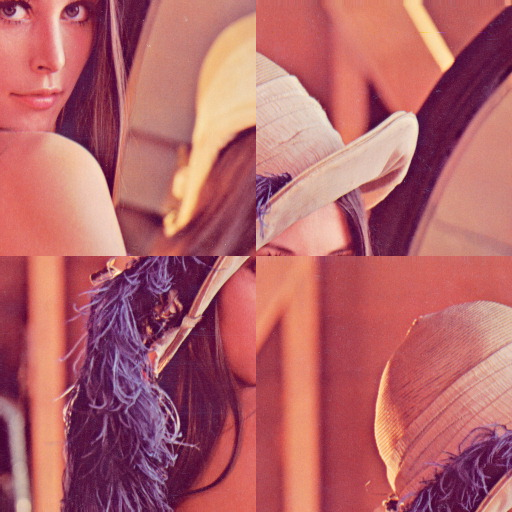

In [36]:
h, w, d = lena.shape
fourth = h // 2
lena_switch = np.copy(lena)
roi = lena[0:fourth, 0:fourth]
lena_switch[0:fourth, 0:fourth] = lena[fourth:w, fourth:w]
lena_switch[fourth:w, fourth:w] = roi
cv2_imshow(lena_switch)

##### Задача 5 (3 балла)

Усредните значения всех трех цветовых каналов **lena** в каждый из каналов итогового изображения **lena_gray_my**.

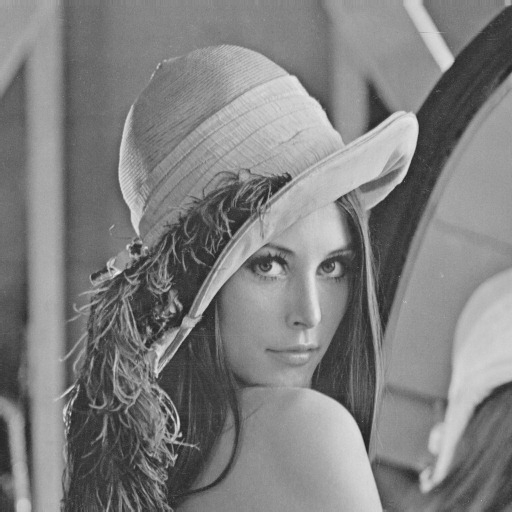

In [37]:
lena_gray_my = np.copy(lena)
lena_gray_my = np.mean(lena_gray_my, axis=2).astype('int')
cv2_imshow(lena_gray_my)

##### Задача 6 (3 балла)

Переведите исходное цветное изображение **lena** в изображение в градациях серого с помощью функции cvtColor. (**lena_gray_cvt**). Вычислите модуль разности между изображениями **lena_gray_my** и **lena_gray_cvt** и отобразите ее на экране.

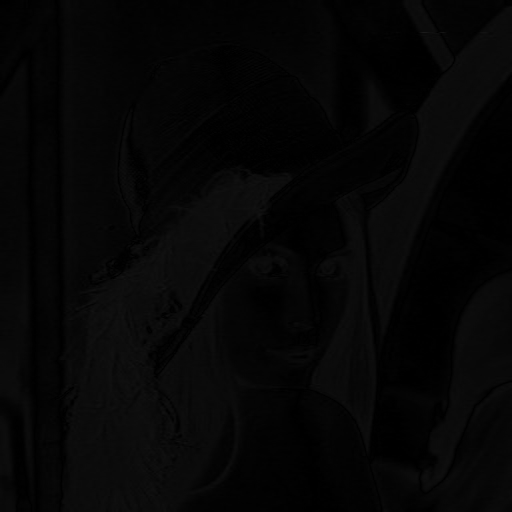

Модуль разницы между изображениями: 26


In [41]:
lena_gray_cvt = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY).astype(np.int64) 
diff = cv2.absdiff(lena_gray_cvt, lena_gray_my)
diff = diff.astype(np.uint8)
cv2_imshow(diff)
print(f'Модуль разницы между изображениями: {diff.max()}')

##### Задача 7 (3 балла)

Переведите исходное изображение **lena** из RGB в HSV. Установите значения S и V в максимум для всех пикселей изображения. Полученное изображение переведите обратно в RGB. Отобразите результат.

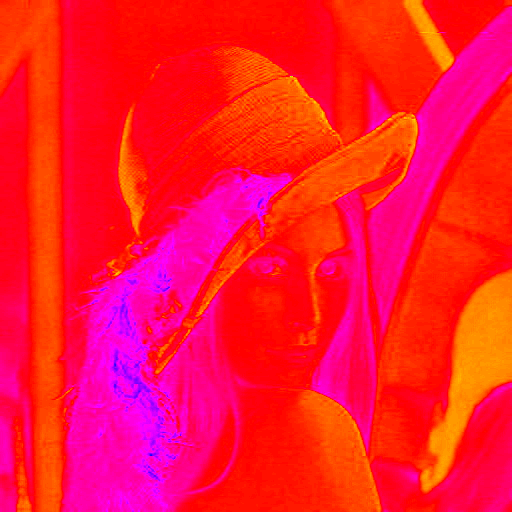

In [61]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV)
lena_hsv[:, :, 1] = [255 for i in range(len(lena_hsv))]
lena_hsv[:, :, 2] = [255 for i in range(len(lena_hsv))]
lena_rgb = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(lena_rgb)

##### Задача 8 (3 балла)
Переведите изображение **lena** в одно из цветовых пространств (cvtColor) с выделенной координатой яркости (HSV, HSL, HSB, CIE Lab), инвертируйте яркостную составляющую, переведите обратно в RGB. Отобразите результат.

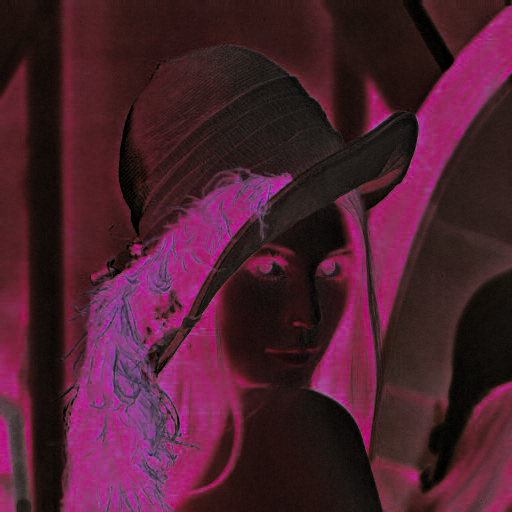

In [62]:
lena_hsv = cv2.cvtColor(lena, cv2.COLOR_BGR2HSV) 
inv = np.flip(np.arange(256))
lena_hsv[:,:,2] = [inv[x] for x in lena_hsv[:,:,2]]
lena_rgb = cv2.cvtColor(lena_hsv, cv2.COLOR_HSV2BGR) 
cv2_imshow(lena_rgb)

##### Задача 9 (3 балла)

По цветному изображению **lena** на входе сгенерируйте 6 цветных изображений, полученных путем перестановки значений цветовых каналов r, g и b. исходного изображения. Соберите коллаж $3x2$ и отобразите его на экране. 

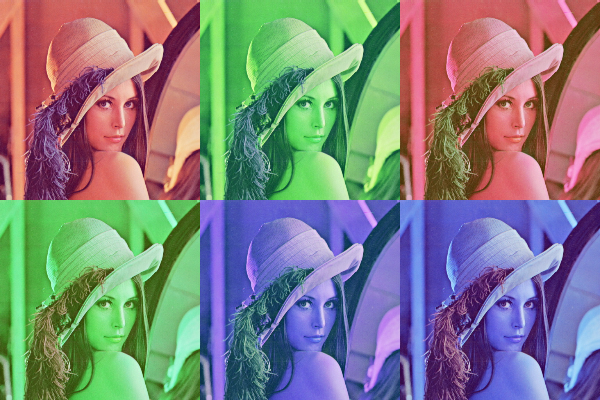

In [63]:
b, g, r = lena[:, :, 0], lena[:, :, 1], lena[:, :, 2]
perem = list(permutations([b, g, r]))

def make_image(i):
  img = np.copy(lena)
  img[:, :, 0] = perem[i][0]
  img[:, :, 1] = perem[i][1]
  img[:, :, 2] = perem[i][2]
  img = cv2.resize(img,(200,200))
  return img

horizontal = lambda x: np.hstack([make_image(x), make_image(x+1), make_image(x+2)])
collage = np.vstack([horizontal(0), horizontal(3)])
cv2_imshow(collage)

##### Задача 10 (3 балла)
Переведите изображение **lena** из RGB в CIE Lab при помощи встроенной функции OpenCV. Загрузите исходное иображение еще раз и переведите из RGB в CIE Lab самостоятельно с помощью формул (google it). Сравните полученные изображения, построив разницу между ними. (Должен получится ~0)

In [33]:
def gamma(channels):
    res = np.where(channels > 0.04045, np.power((channels + 0.055)/1.055, 2.4), channels / 12.92)
    return res


def f(t):
    return np.where(t <= 0.008856, 7.787 * t + 16/116, np.power(t, 1/3))

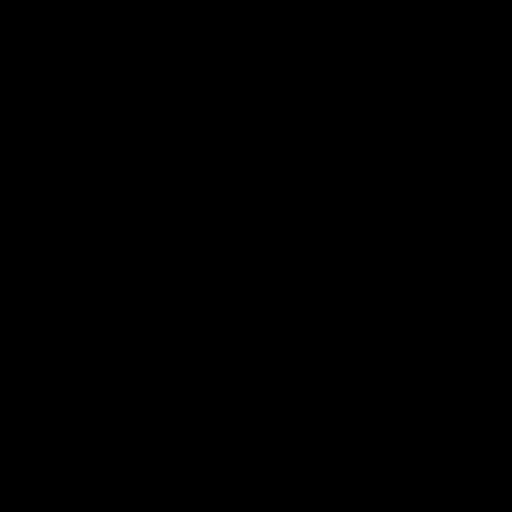

Разница между изображениями: 1.411


In [45]:
lena_cie_cv = cv2.cvtColor(lena, cv2.COLOR_BGR2Lab)
lena_cie_my = cv2.cvtColor(lena, cv2.COLOR_BGR2RGB).astype(np.float64) / 255.
lena_cie_my = np.apply_along_axis(lambda x: gamma(x), 2, lena_cie_my)


matrix = np.array([[0.412453, 0.357580, 0.180423],
                    [0.212671, 0.715160, 0.072169], 
                    [0.019334, 0.119193, 0.950227]])

lena_cie_my = lena_cie_my.T.reshape(3, -1)
lena_cie_my = matrix @ lena_cie_my 
lena_cie_my = lena_cie_my.reshape(3, 512, 512).T 

x, y, z = lena_cie_my[:, :, 0], lena_cie_my[:, :, 1], lena_cie_my[:, :, 2]

x /= 0.950456
z /= 1.088754

L = np.where(y > 0.008856, 116. * np.power(y, 1/3.0) - 16.0, 903.3 * y)
L = L * 255. / 100.

a = 500 * (f(x) - f(y))
a = a + 128.

b = 200 * (f(y) - f(z))
b = b + 128.

lena_cie_my[:, :, 0] = L
lena_cie_my[:, :, 1] = a
lena_cie_my[:, :, 2] = b

lena_cie_my = lena_cie_my.astype(np.float64)
lena_cie_cv = lena_cie_cv.astype(np.float64)
diff = cv2.absdiff(lena_cie_cv, lena_cie_my)
cv2_imshow(diff)
print(f'Разница между изображениями: {np.round(diff.max(), 4)}')